## 데이터 인코딩

### 레이블 인코딩(Label encoding)
- 카테고리 피처를 코드형 숫자 값으로 변환,ex) 과일 : 1, 과자:2, 액체류: 3

### 원핫 인코딩(One Hot encoding)
- 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 컬럼에만 1을 표시하고 나머지 컬럼에는 0을 표시하는 방식

### 빈도 인코딩(Frequency Encoding)
### SVD 잠재의미 분석 인코딩

#### 레이블 인코딩 예시

In [2]:
from sklearn.preprocessing import LabelEncoder
items = ['TV','냉장고','전자레인지','노트북','선풍기','선풍기','믹서기','믹서기']

# 객체 생성
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값', labels)

인코딩 변환값 [0 1 5 2 4 4 3 3]


In [4]:
# 데이터가 많은 경우
print('인코딩 클래스:', encoder.classes_) # 0부터 순서대로 원본을 가짐

인코딩 클래스: ['TV' '냉장고' '노트북' '믹서기' '선풍기' '전자레인지']


In [7]:
# 디코딩
print('디코딩 값:', encoder.inverse_transform([4,5,2,0,1,1,3,3,2,4,4,4,4,4,4]))

디코딩 값: ['선풍기' '전자레인지' '노트북' 'TV' '냉장고' '냉장고' '믹서기' '믹서기' '노트북' '선풍기' '선풍기' '선풍기'
 '선풍기' '선풍기' '선풍기']


레이블 인코딩 사용 시 주의사항
- 문자열 값을 숫자형 카테고리 값으로 변환 > 몇몇 ML 알고리즘에는 예측 성능이 떨어질 수 있음(가중되어 계산) > **원핫인코딩 사용**
- 트리 계열의 ML알고리즘은 숫자 특성을 반영하지 않으므로, 문제 없음

#### 원핫 인코딩 예시

In [10]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서기','믹서기']

# 2차원 ndarray 로 전환
items = np.array(items).reshape(-1,1)

# 원핫인코딩을 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# 변환한 결과(희소행렬) > 밀집 행렬로 변환
print('원핫인코딩데이터:')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원:')
print(oh_labels.shape)


원핫인코딩데이터:
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원:
(8, 6)


In [12]:
import pandas as pd
df_1 = pd.DataFrame({'이름':['홍길동','김영희','김철수','박철수','오철수','정철수','정철수','배철수']})
df_1

,이름
0,홍길동
1,김영희
2,김철수
3,박철수
4,오철수
5,정철수
6,정철수
7,배철수


In [13]:
pd.get_dummies(df_1) # 원핫인코딩 바로 사용 가능_pandas 에서 지원하는 API

,이름_김영희,이름_김철수,이름_박철수,이름_배철수,이름_오철수,이름_정철수,이름_홍길동
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0
5,0,0,0,0,0,1,0
6,0,0,0,0,0,1,0
7,0,0,0,1,0,0,0


In [14]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [15]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [17]:
df_sns = df[['sex','embarked','class']]

In [18]:
df_1 = pd.get_dummies(df_sns)

In [19]:
df_1

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1
3,1,0,0,0,1,1,0,0
4,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,1,0
887,1,0,0,0,1,1,0,0
888,1,0,0,0,1,0,0,1
889,0,1,1,0,0,1,0,0


In [22]:
df_1 = df_1+1 # 숫자 하나로 완성된 데이터 프레임 만들기 가능

In [23]:
df_1

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
0,2,3,2,2,3,2,2,3
1,3,2,3,2,2,3,2,2
2,3,2,2,2,3,2,2,3
3,3,2,2,2,3,3,2,2
4,2,3,2,2,3,2,2,3
...,...,...,...,...,...,...,...,...
886,2,3,2,2,3,2,3,2
887,3,2,2,2,3,3,2,2
888,3,2,2,2,3,2,2,3
889,2,3,3,2,2,3,2,2


In [24]:
df_tt = pd.concat([df,df_1],axis = 1)
df_tt

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,alive,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,no,False,2,3,2,2,3,2,2,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,yes,False,3,2,3,2,2,3,2,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,yes,True,3,2,2,2,3,2,2,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,yes,False,3,2,2,2,3,3,2,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,no,True,2,3,2,2,3,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,...,no,True,2,3,2,2,3,2,3,2
887,1,1,female,19.0,0,0,30.0000,S,First,woman,...,yes,True,3,2,2,2,3,3,2,2
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,...,no,False,3,2,2,2,3,2,2,3
889,1,1,male,26.0,0,0,30.0000,C,First,man,...,yes,True,2,3,3,2,2,3,2,2


## 피처 스케일링과 정규화

### 피처 스케일링(Feature Scailing)

#### 표준화(Standardization) ,정규화(Normalization)

- 표준화 : 피처 각각의 평균0 분산1인 가우시안 정규분포를 가진 값으로 변환(x의 평균을 뺀값을 x의 표준편차로 나누어 계산)
    - 전체 평균을 기준으로 어느정도 떨어져잇는지 나타낼 때 사용! ( -, 1 이상의 값도 가질 수 있음)
    - 데이터가 가우시안 분포를 가진다고 가정하고 구현하는 모델(SVM, Linear Regression, Logistic Regression) 등은 사전에 표준화를 진행하는 것이 예측 성능 향상에 중요

- 정규화 : 데이터 범위를 0부터 1까지로 변환
    - 데이터의 분포를 조정하는 방법(0,1의 값을 가짐)
    - 두 변수를 동일한 크기 단위로 비교하기 위하여 변환

<div class="alert alert-block" style="border: 2px solid #E65100;background-color:#FFF3E0;padding:10px">
    
#사이킷런 전처리에서 제공하는 Normalizer 모듈과 일반적인 정규화는 약간의 차이가 있음
- 사이킷런의 Normalizer 모듈은 선형대수에서의 정규화 개념 적용, 개별 벡터의 크기를 맞추기 위해 변환 의미
- 즉, 개별 벡터를 모든 피처 벡터의 크기로 나눔, 세 개의 피처 x,y,z가 있으면 새로운 데이터 x_new는 원래 값에서 세 개의 피처의 i번째 피처 값에 해당하는 크기를 합한 값으로 나눠줌 (정규 벡터화)
    

</div>

### StandardScaler
- 표준화를 지원하는 클래스
- 개별피처 (0,1) 가우시안 정규 분포를 따르도록 변환

In [30]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)

In [33]:
# 피처들의 평균값, 분산값 확인
print('평균:', iris_df.mean())
print('분산:',iris_df.var())

평균: sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
분산: sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [34]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 객체 생성
scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# numpy array 값인 scaled 값을 dataframe형태로 변환
iris_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)

print('평균:', iris_scaled.mean())
print('분산:',iris_scaled.var())



평균: sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
분산: sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


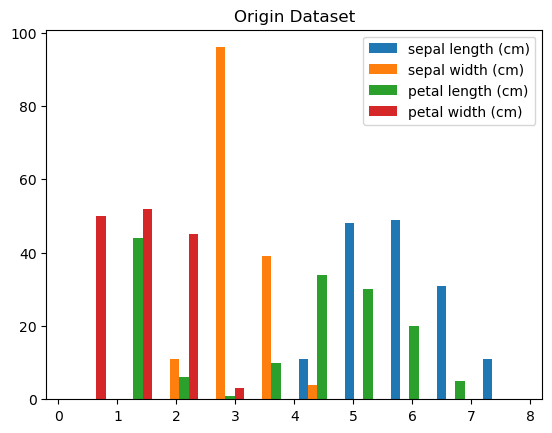

In [41]:
# 직접계산
iris_df_standarded = (iris_df - iris_df.mean())/iris_df.std()

plt.title('Origin Dataset')
plt.hist(iris_df)
plt.legend(iris_df.columns)

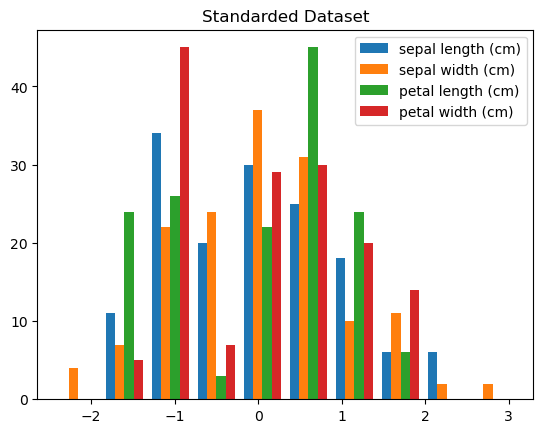

In [43]:
plt.title('Standarded Dataset')
plt.hist(iris_df_standarded)
plt.legend(iris_scaled.columns)

### MinMax Scaler
- 데이터 값을 0과 1사이로 변환(음수라면 -1,1사이로 변환)
- 데이터가 가우시안 분포가 아닌 경우에 사용
- 분류보다 회귀에 유용함

In [44]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler객체 생성
scaler = MinMaxScaler()
#MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### MaxAbsScaler()
- 각 특성의 절대값이 0과 1사이가 되도록 스케일링
- 모든 값은 -1과 1사이로 표현, 데이터가 양수일 경우 MinMaxScaler 와 같다
- 이상치에 매우 민감

In [45]:
from sklearn.preprocessing import MaxAbsScaler

# 변형 객체 생성
maxabs_scaler = MaxAbsScaler()

# 훈련데이터의 모수 분포 저장
maxabs_scaler.fit(iris_df)

# 훈련 데이터 스케일링
iris_scaled = maxabs_scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

# 테스트 데이터의 스케일링
#X_test_scaled = maxabs_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = maxabs_scaler.inverse_transform(X_train_scaled)

feature들의 최솟값
sepal length (cm)    0.544304
sepal width (cm)     0.454545
petal length (cm)    0.144928
petal width (cm)     0.040000
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### RobustScaler()
- 평균과 분산 대신에 사분위값 사용
- 중간 값은 정렬 시 중간에 있는 값을 의미
- 1/4, 3/4 에 위치한 값을 의미
- 이상치 영향을 최소화

In [47]:
from sklearn.preprocessing import RobustScaler

# 변형 객체 생성
robust_scaler = RobustScaler()

# 훈련데이터의 모수 분포 저장
robust_scaler.fit(iris_df)

# 훈련 데이터 스케일링
iris_scaled = robust_scaler.transform(iris_df)

# 테스트 데이터의 스케일링
#X_test_scaled = robust_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = robust_scaler.inverse_transform(X_train_scaled)


#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)   -1.153846
sepal width (cm)    -2.000000
petal length (cm)   -0.957143
petal width (cm)    -0.800000
dtype: float64

feature들의 최댓값
sepal length (cm)    1.615385
sepal width (cm)     2.800000
petal length (cm)    0.728571
petal width (cm)     0.800000
dtype: float64


### Normaliizer()
- 통계치를 이용하는 stadard,minmax,maxabs,robust와 달리, 행마다 적용된다.
- 한 행의 모든 특성들 사이의 유클리드 거리가 1이 되도록 스케일링
- 일반적인 데이터 전처리에 사용하지 않고, 모델 내 학습 벡터(특히, 딥러닝)에 적용하며, 피쳐들의 단위가 다를경우 사용하지 않는다.

In [49]:
from sklearn.preprocessing import Normalizer

# 변형 객체 생성
normal_scaler = Normalizer()

# 훈련데이터의 모수 분포 저장
normal_scaler.fit(iris_df)

# 훈련 데이터 스케일링
X_train_scaled = normal_scaler.transform(iris_df)
#transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())
# 테스트 데이터의 스케일링
#X_test_scaled = normal_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = normal_scaler.inverse_transform(X_train_scaled)

feature들의 최솟값
sepal length (cm)   -1.153846
sepal width (cm)    -2.000000
petal length (cm)   -0.957143
petal width (cm)    -0.800000
dtype: float64

feature들의 최댓값
sepal length (cm)    1.615385
sepal width (cm)     2.800000
petal length (cm)    0.728571
petal width (cm)     0.800000
dtype: float64
